# Model Comparison
## Find the Best Model

This notebook loads all of the comparison csvs generated by `compare_models.py` that is run five times per day on a random subset of eight subreddits.

Examples of different ways to group classifiers and sort based on desired metric.

Each model also has a `best_params` column that gives the best parameters for that model on each run.
There is a dictionary that includes the estimator, parameter, value, and count of times that value was chosen as the best.
Also included is a function to plot the best parameter values.

In [2]:
# --- Absolute Import Fix --- #
# Use this if script needs to be run standalone
import os
import sys
from dotenv import find_dotenv
sys.path.append(os.path.dirname(find_dotenv()))

In [3]:
from pprint import pprint
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from glob import glob
from collections import Counter, namedtuple
import itertools
import operator

from pathlib import Path
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
from textron import CONFIG
from textron.autocompare import grid_models

In [5]:
!pwd
print(f'Name: {__name__}')
print(f'Package: {__package__}')

/Users/chris/github/textron/textron/autocompare
Name: __main__
Package: None


In [70]:
reports = CONFIG.MODEL_COMPARE_DIR.glob('*.csv')

In [71]:
df = pd.DataFrame()

In [72]:
for report in reports:
    data = pd.read_csv(report)
    df = df.append(data)
len(df)    

1145

In [73]:
df.drop(columns='Unnamed: 0', inplace=True)

In [74]:
columns_of_interest = ['preprocessor','estimator','best_test_score', 'roc_auc', 'fit_time_seconds','time_weighted_score']

In [75]:
df.groupby(by='estimator')[columns_of_interest].agg(
    np.mean).sort_values(by='best_test_score', ascending=False)

,best_test_score,roc_auc,fit_time_seconds,time_weighted_score
estimator,,,,
Linear SVC,0.678785,0.889473,0.210505,3171.541129
Stochastic Gradient Descent Classifier,0.677118,0.889473,0.210140,3185.179355
Multinomial Bayes Classifier,0.673054,0.906183,0.124527,4870.176140
Logistic Regression,0.672172,0.902806,0.336258,2124.685559
Bagging Classifier Logistic Regression,0.670067,0.908900,778.082700,3.272733
Passive Agressive Classifier,0.663129,0.889473,0.386602,1789.664452
Support Vector Classifier,0.662882,0.906183,5.901796,104.860731
Extra Trees Classifier,0.649430,0.889473,54.326914,13.859538
XGBoost Classifier,0.634796,0.884935,30.219796,43.016462


In [76]:
df.groupby(by='estimator')[columns_of_interest].agg(
    np.mean).sort_values(by='roc_auc', ascending=False)

,best_test_score,roc_auc,fit_time_seconds,time_weighted_score
estimator,,,,
Bagging Classifier Logistic Regression,0.670067,0.908900,778.082700,3.272733
Multinomial Bayes Classifier,0.673054,0.906183,0.124527,4870.176140
Support Vector Classifier,0.662882,0.906183,5.901796,104.860731
Logistic Regression,0.672172,0.902806,0.336258,2124.685559
Random Forest,0.630108,0.890570,3.316656,213.735258
Extra Trees Classifier,0.649430,0.889473,54.326914,13.859538
Linear SVC,0.678785,0.889473,0.210505,3171.541129
Passive Agressive Classifier,0.663129,0.889473,0.386602,1789.664452
Stochastic Gradient Descent Classifier,0.677118,0.889473,0.210140,3185.179355


In [77]:
df.groupby(by='estimator')[columns_of_interest].agg(
    np.mean).sort_values(by='time_weighted_score', ascending=False)

,best_test_score,roc_auc,fit_time_seconds,time_weighted_score
estimator,,,,
Multinomial Bayes Classifier,0.673054,0.906183,0.124527,4870.176140
Stochastic Gradient Descent Classifier,0.677118,0.889473,0.210140,3185.179355
Linear SVC,0.678785,0.889473,0.210505,3171.541129
Logistic Regression,0.672172,0.902806,0.336258,2124.685559
Passive Agressive Classifier,0.663129,0.889473,0.386602,1789.664452
K Nearest Neighbors,0.306054,0.606315,0.181750,330.896924
Random Forest,0.630108,0.890570,3.316656,213.735258
Support Vector Classifier,0.662882,0.906183,5.901796,104.860731
AdaBoost Classifier,0.474387,0.740301,4.704043,93.495710


# Best Params

In [237]:
# preprocessors = grid_models.preprocessors.copy()
# estimators = grid_models.estimators.copy()
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

estimators = {
    "logisticregression": {
        "name": "Logistic Regression",
        "estimator": LogisticRegression(max_iter=1000, fit_intercept=False, C=.99),
        "pipe_params": {
            "logisticregression__solver": ["lbfgs", "saga"]
        }
    },
    "randomforestclassifier": {
        "name": "Random Forest",
        "estimator": RandomForestClassifier(min_samples_leaf=2, min_samples_split=.01),
        "pipe_params": {
            "randomforestclassifier__n_estimators": [100, 300, 500, 1000],
            "randomforestclassifier__max_depth": np.linspace(400, 1000, 5, dtype=int)
        }
    }
}

In [238]:
params_list = []
for param_grid in df.best_params:
    for key, value in eval(param_grid).items():
        estimator, parameter = key.split('__')
        params_list.append((estimator, parameter, value))
        

counted_params = dict(Counter(params_list))
listed_params = [[key[0], key[1], key[2], value] for key, value in counted_params.items()]
parameters_with_counts = pd.DataFrame(listed_params, columns=['estimator', 'parameter', 'value', 'count'])

In [239]:
parameters_with_counts.sort_values(by='estimator', ascending=False)[:10]

,estimator,parameter,value,count
0,xgbclassifier,n_estimators,200,68
1,xgbclassifier,max_depth,5,32
73,xgbclassifier,max_depth,10,43
72,xgbclassifier,n_estimators,100,20
67,xgbclassifier,hidden_layer_sizes,50,31
63,xgbclassifier,max_depth,20,18
62,xgbclassifier,n_estimators,50,4
46,xgbclassifier,hidden_layer_sizes,25,30
2,xgbclassifier,hidden_layer_sizes,10,31
8,tfidfvectorizer,max_features,7000,587


In [240]:
worst_parameters = parameters_with_counts.loc[parameters_with_counts.groupby(by=['estimator', 'parameter'])['count'].idxmin()]
worst_param_array = worst_parameters.values
# worst_param_array

In [241]:
def convert_pipe_arrays_to_lists(grid):
    # converts numpy arrays to lists
    for estimator, params in grid.items():
        for param, param_value in params.get('pipe_params').items():
            if isinstance(param_value, np.ndarray):
                fixed_value = param_value.tolist()
                print(f'Fixed {param}: {param_value}')
                grid[estimator]['pipe_params'][param] = fixed_value

convert_pipe_arrays_to_lists(estimators)

Fixed randomforestclassifier__max_depth: [ 400  550  700  850 1000]


In [242]:
def delete_worst_parameter_values(worst_param_array, grid):
    for worst_param in worst_param_array:
        estimator = worst_param[0]
        param = worst_param[1]
        value = worst_param[2]
        retrieved_estimator = grid.get(estimator)
        if retrieved_estimator is not None:
            pipe_params = retrieved_estimator.get('pipe_params')
            if pipe_params is not None:
                param_to_delete = pipe_params.get(f'{estimator}__{param}')
                if param_to_delete is not None:
                    param_to_delete.remove(value)
                    print(f'Deleted: {value} From parameter: {estimator}__{param}')
                    print()


delete_worst_parameter_values(worst_param_array, estimators)

Deleted: "lbfgs" From parameter: "logisticregression__solver"

Deleted: "1000" From parameter: "randomforestclassifier__max_depth"

Deleted: "100" From parameter: "randomforestclassifier__n_estimators"



In [41]:
def plot_best_params(model_param_dict, estimator, parameter=None, cmap='Blues_r'):
    '''Plots parameters and values for estimator.
        Omit parameter value to get all parameters for estimator.
    '''
    font={'size': 24}

    if parameter is None: # list all params 
        string_keys = [(f'{key.parameter}: {key.value}') for key, _ in sorted(model_param_dict.items(), key=lambda item: item[1], reverse=True) if key.estimator == estimator]
        string_values = [value for key, value in sorted(model_param_dict.items(), key=lambda item: item[1], reverse=True) if key.estimator == estimator]
        
        plt.figure(figsize=(2 * len(string_keys), 2 * len(string_keys)))
        plt.title(f'{estimator.upper()}', fontdict=font)
        
        sns.barplot(y=string_keys, x=string_values, orient='h', palette=cmap);
    
    else: # specific parameter
        string_keys = [(f'{key.parameter}: {key.value}') for key, _ in sorted(model_param_dict.items(), key=lambda item: item[1], reverse=True) if key.estimator == estimator and key.parameter == parameter]
        string_values = [value for key, value in sorted(model_param_dict.items(), key=lambda item: item[1], reverse=True) if key.estimator == estimator and key.parameter == parameter]
        
        plt.figure(figsize=(2 * len(string_keys), 2 * len(string_keys)))
        plt.title(f'{estimator.upper()} {parameter.upper()}', fontdict=font)

        sns.barplot(y=string_keys, x=string_values, orient='h', palette=cmap);



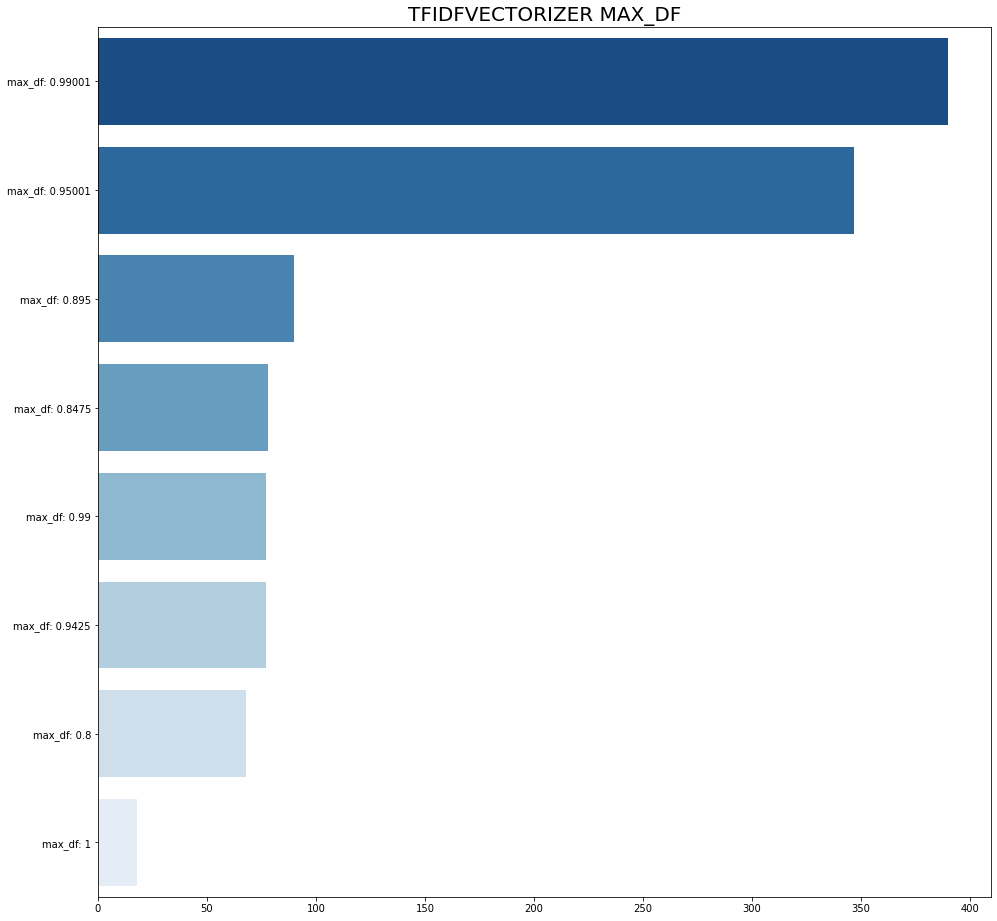

In [43]:
plot_best_params(counted_model_parameters, 'tfidfvectorizer', 'max_df')

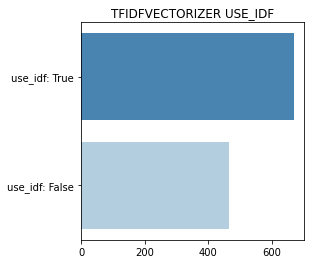

In [75]:
plot_best_params('tfidfvectorizer', 'use_idf')

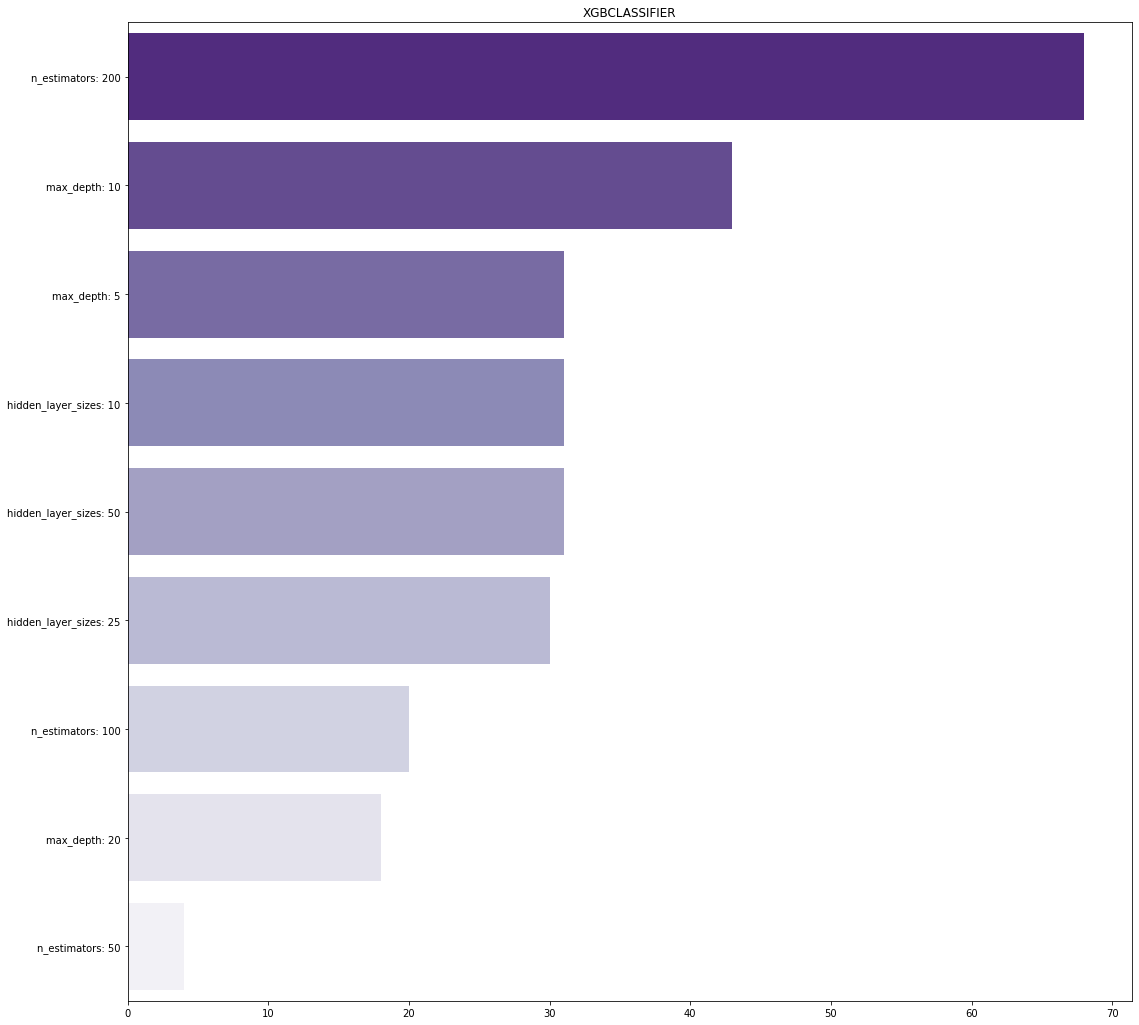

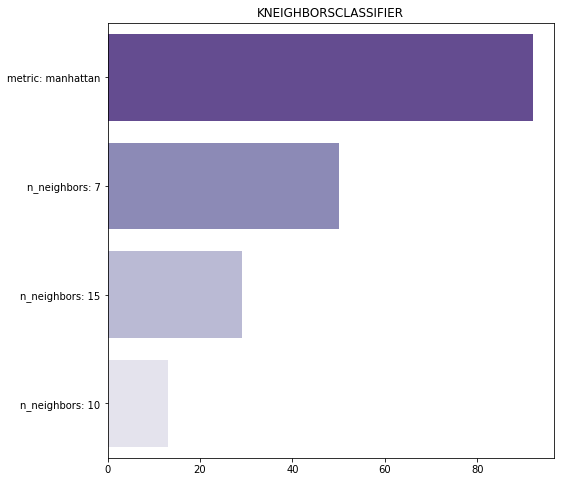

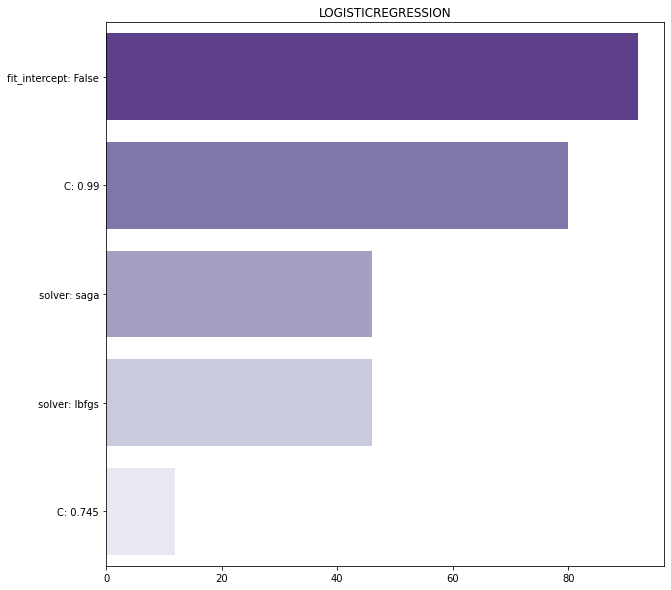

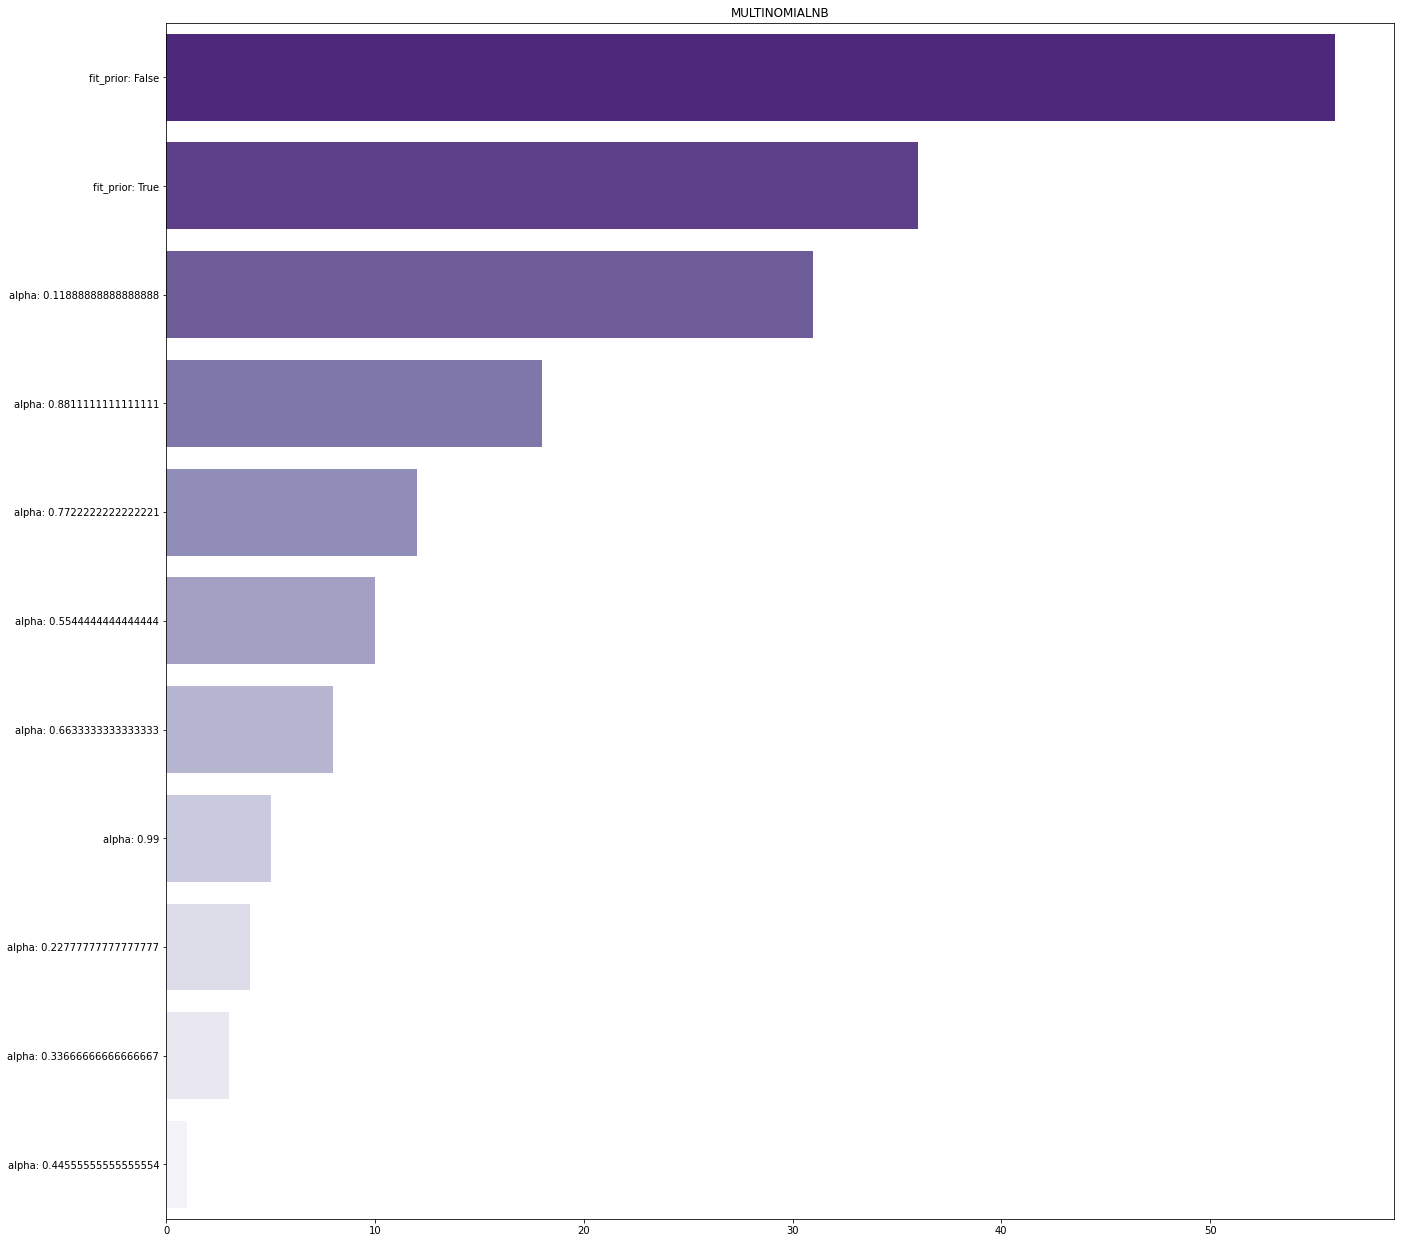

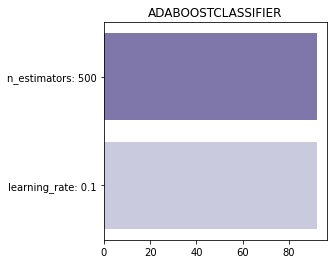

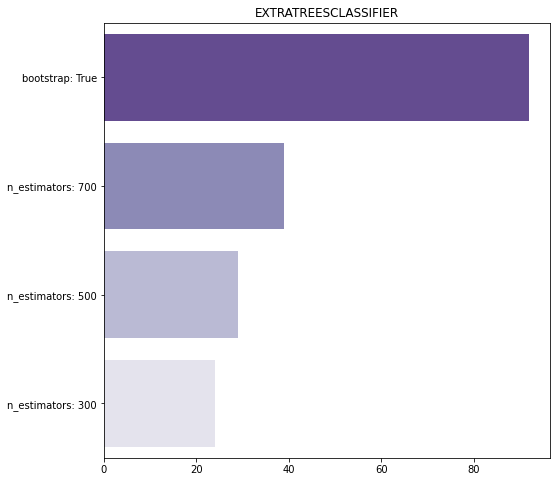

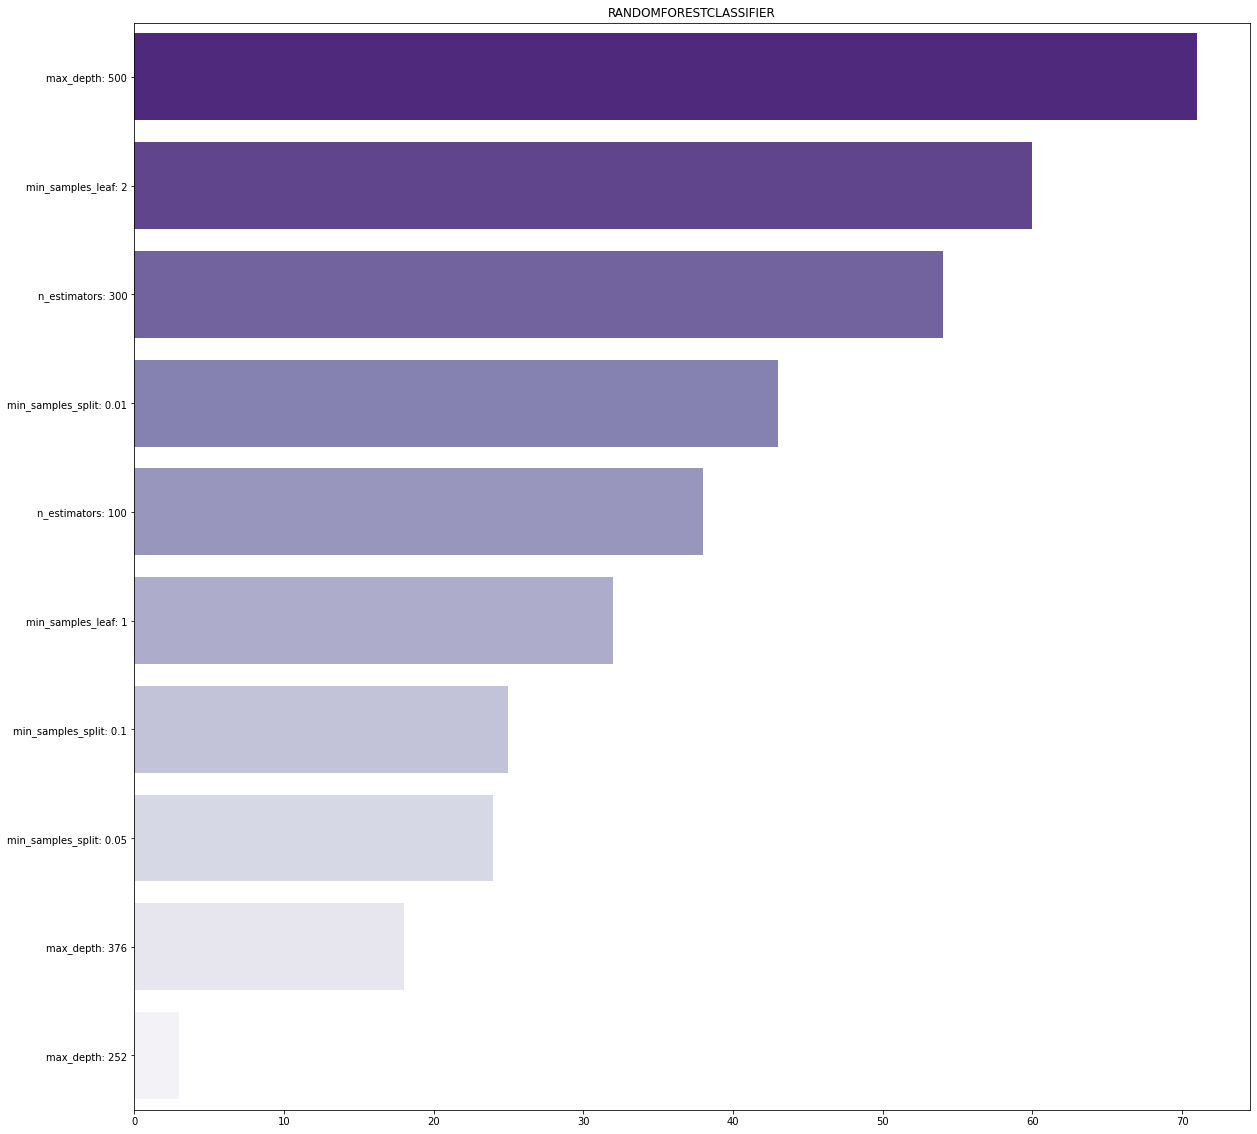

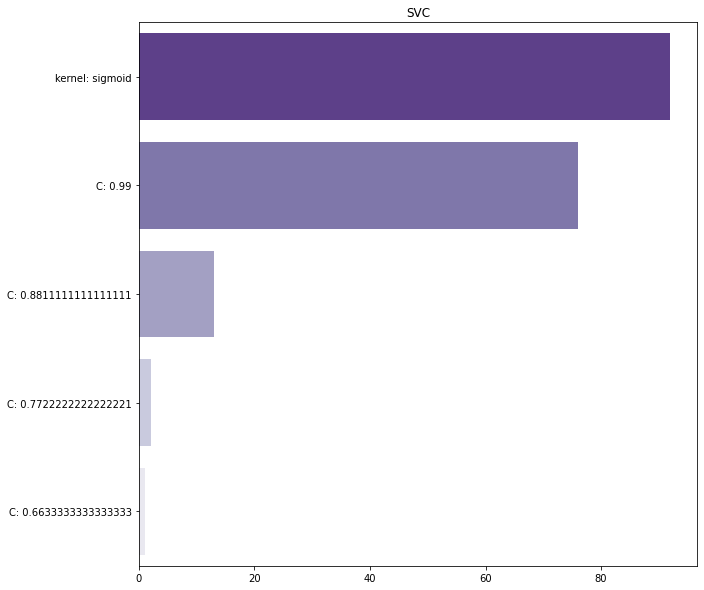

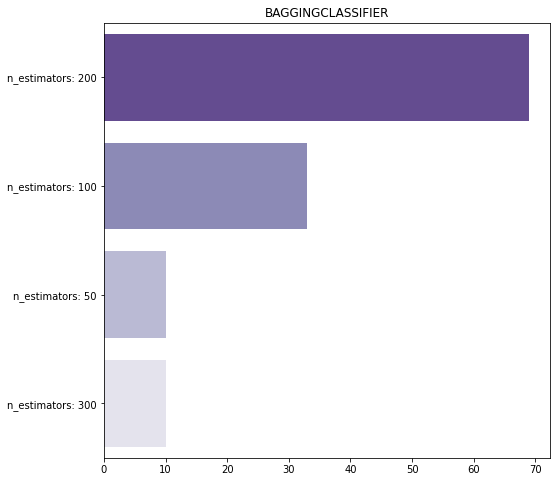

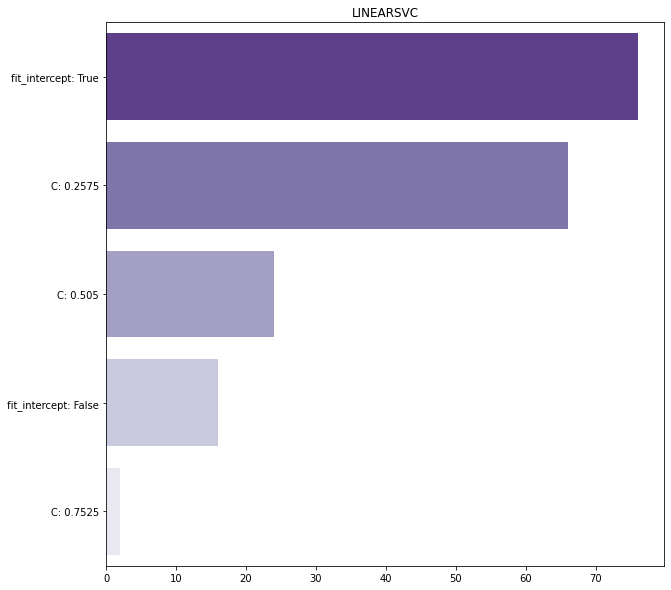

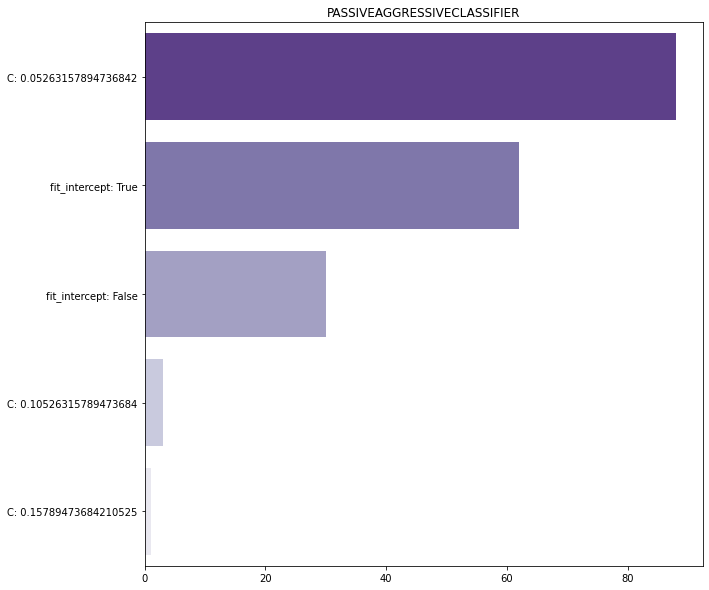

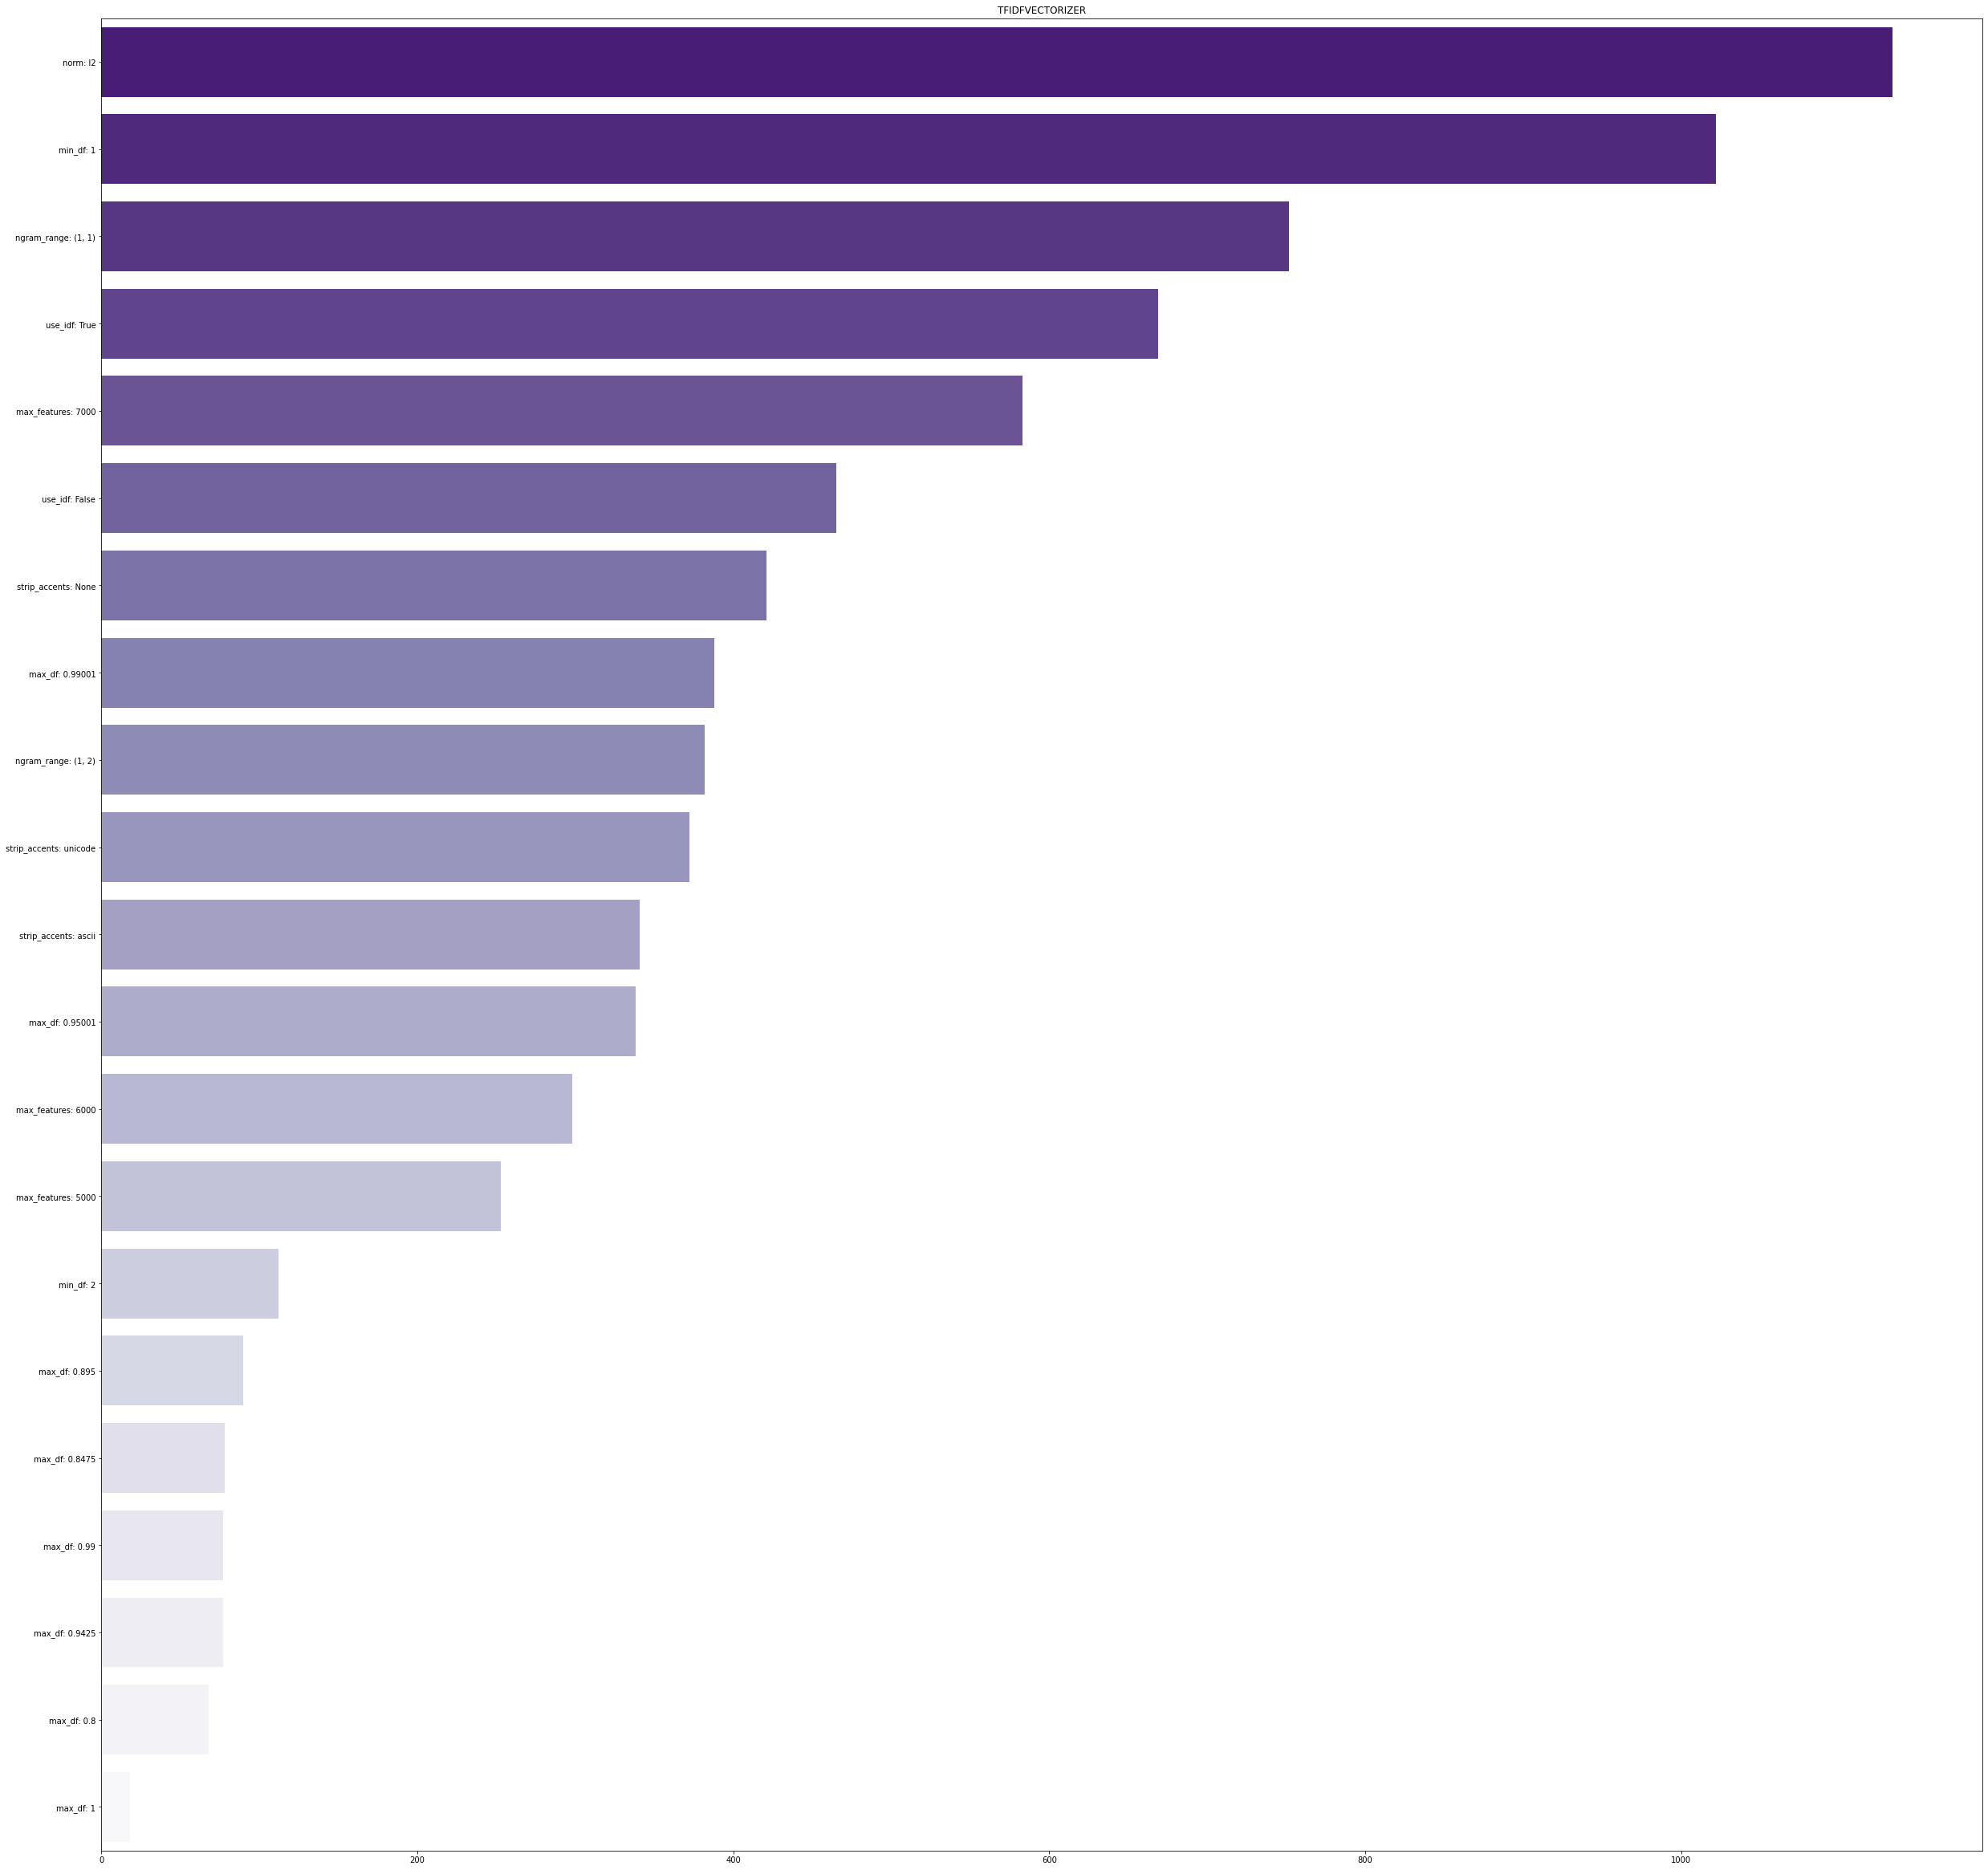

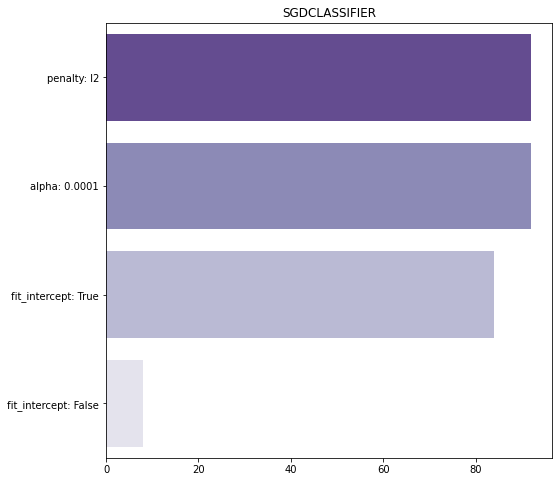

In [73]:
estimators = set(estimator[0] for estimator in counted.keys())
for estimator in estimators:
    plot_best_params(estimator, cmap='Purples_r')